In [1]:
pwd

'/home/jose/Desktop/Gitlab/mitacs/mitacs_project/02_First_time_passage/Simulations'

In [2]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

In [3]:
import dump
import numpy as np
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib notebook

In [4]:
import Py_FTP_Langevin as ftp
import ftp_support

In [5]:
k_B = 1.38066e-23    #! Boltzmann constant in (J/K)
Na = 6.02214076 * pow(10,23) # 1/mol

In [13]:
T = 1700
k_BT = T * k_B

In [6]:
fontsize_axis = 20
fontsize_legend = 16
fontsize_ticks = 14

# First time passage simulations

In [7]:
direct = "aggregate_info"

In [38]:
import os

def Open_FTP_results(path):
    # DMA HV renamed as V1
    cols = ["Kn_d_j","H","ftp_times_j","ftp_times_std_j",
            "tau_12_j","Kn_g_j","L_j","Rc_j","V_box","t_ij",
            "A_j_k_BT","f_12_j","beta_j"]
    data = pd.read_csv(path,delimiter=',', names=cols)
    return data

def Open_FTP_recursively(direct):
    files = os.listdir(direct)
    files.sort()
    # Open spheres:
    simulations = Open_FTP_results(direct+files[0])
    simulations["folder"] = files[0]
    for i in range(1,len(files)):
        new_simulations = Open_FTP_results(direct+files[i])
        new_simulations["folder"] = files[i]
        simulations = pd.concat([simulations, new_simulations])
    #simulations = simulations.groupby(by=["A_j_k_BT","folder"]).agg((np.mean))
    simulations = simulations.reset_index()
    return simulations

In [39]:
simulations = Open_FTP_recursively("RES_out/spheres/")
simulations

index      Kn_d_j            H   ftp_times_j  ftp_times_std_j  \
0       0  621.245273  3919.841265  3.635967e-07     3.239685e-07   
1       1  196.509293  1775.088122  1.730302e-06     1.821259e-06   
2       2   62.178857   431.753125  1.533555e-05     1.242372e-05   
3       3   19.688257   145.404801  9.823219e-05     9.843685e-05   
4       4    6.243773    56.863759  5.427130e-04     4.687349e-04   
5       5    1.987119     9.056730  7.388299e-03     6.639277e-03   
6       6    0.637763     2.372264  6.167681e-02     5.972603e-02   
7       7    0.209068     0.641932  5.090458e-01     5.207345e-01   
8       8    0.072328     0.053562  1.437938e+01     1.483078e+01   
9       9    0.028208     0.010760  1.901996e+02     2.018831e+02   
10      0  621.245273  4697.062501  3.034325e-07     3.445201e-07   
11      1  196.509293  1958.656549  1.568135e-06     1.405130e-06   
12      2   62.178857   609.582479  1.086181e-05     9.454727e-06   
13      3   19.688257   180.655615  7.906443e-05     7.390205e-05   
14      4    6.243773    54.387293  5.674248e-04     7.968183e-04   
15      5    1.987119    11.018674  6.072766e-03     5.271727e-03   
16      6    0.637763     2.743683  5.332747e-02     6.114138e-02   
17      7    0.209068     0.487271  6.706187e-01     6.503073e-01   
18      8    0.072328     0.069322  1.111037e+01     9.186199e+00   
19      9    0.028208     0.009831  2.081724e+02     2.172377e+02   
20      0  621.245273  4084.123353  3.489712e-07     4.087150e-07   
21      1  196.509293  1110.818926  2.765021e-06     2.781085e-06   
22      2   62.178857   530.538789  1.248009e-05     1.284342e-05   
23      3   19.688257   139.261521  1.025655e-04     1.024317e-04   
24      4    6.243773    53.133296  5.808166e-04     6.037757e-04   
25      5    1.987119    15.196133  4.403346e-03     4.599970e-03   
26      6    0.637763     2.614672  5.595870e-02     5.605292e-02   
27      7    0.209068     0.469633  6.958045e-01     6.680495e-01   
28      8    0.072328     0.058065  1.326432e+01     1.084839e+01   
29      9    0.028208     0.011491  1.780991e+02     1.948250e+02   
30      0  621.245273  3371.031275  4.227909e-07     4.189603e-07   
31      1  196.509293  1374.158694  2.235141e-06     1.704491e-06   
32      2   62.178857   307.235683  2.155078e-05     1.963632e-05   
33      3   19.688257    71.668268  1.992993e-04     2.020248e-04   
34      4    6.243773    28.199989  1.094351e-03     1.147125e-03   
35      5    1.987119    10.207160  6.555577e-03     5.611413e-03   
36      6    0.637763     2.482393  5.894056e-02     5.088221e-02   
37      7    0.209068     0.418446  7.809206e-01     1.010684e+00   
38      8    0.072328     0.070104  1.098645e+01     9.140667e+00   
39      9    0.028208     0.008284  2.470269e+02     2.638606e+02   

        tau_12_j      Kn_g_j           L_j          Rc_j         V_box  \
0   2.783667e-09  979.472972  8.000000e-08  9.999991e-10  5.120000e-22   
1   5.998887e-09  454.631081  1.723548e-07  2.154433e-09  5.120000e-21   
2   1.293194e-08  211.021055  3.713271e-07  4.641585e-09  5.120000e-20   
3   2.789726e-08   97.947297  8.000000e-07  9.999991e-09  5.120000e-19   
4   6.027465e-08   45.463108  1.723548e-06  2.154433e-08  5.120000e-18   
5   1.306907e-07   21.102105  3.713271e-06  4.641585e-08  5.120000e-17   
6   2.857681e-07    9.794730  8.000000e-06  9.999991e-08  5.120000e-16   
7   6.382268e-07    4.546311  1.723548e-05  2.154433e-07  5.120000e-15   
8   1.504272e-06    2.110211  3.713271e-05  4.641585e-07  5.120000e-14   
9   3.996995e-06    0.979473  8.000000e-05  9.999991e-07  5.120000e-13   
10  2.783667e-09  979.472972  8.000000e-08  9.999991e-10  5.120000e-22   
11  5.998887e-09  454.631081  1.723548e-07  2.154433e-09  5.120000e-21   
12  1.293194e-08  211.021055  3.713271e-07  4.641585e-09  5.120000e-20   
13  2.789726e-08   97.947297  8.000000e-07  9.999991e-09  5.120000e-19   
14  6.027465e-08   45.463108  1.723548e-06  2.154433e-08  5.1200

In [40]:
A = np.unique(simulations["A_j_k_BT"].values) * k_BT
A

array([0.00000000e+00, 2.34094508e-20, 4.66956882e-20, 9.31455983e-20])

In [41]:
def vdW_sphere_sphere(a1,a2,d, A):
    """
    Determines Hamaker vdW interaction
    energy between two spheres

        Parameters
        ----------
        ai : float
            Radius of the i'th sphere
        d : float
            Distance between centers of both
            spheres
        A : float
            Hamaker's constant
        
        Returns
        -------
        u_vdw: float
            The total interaction energy between
            both spheres
    """
    U_atr1 = 2*a1*a2/(d**2-(a1+a2)**2)
    U_atr2 = 2*a1*a2/(d**2-(a1-a2)**2)
    U_atr3 = np.log((d**2-(a1+a2)**2)/(d**2-(a1-a2)**2))
    U_vdw = -(A/6)*(U_atr1 + U_atr2 + U_atr3)
    return float(U_vdw)

def ev_dE_dr(r,a,A):
    E1 = vdW_sphere_sphere(a,a,r, A)
    dr = 0.00000001 * r
    E2 = vdW_sphere_sphere(a,a,r+dr, A)
    return (E2-E1)/dr

def ev_dE2_dr2(r,a,A):
    dr = 0.00000001 * r
    E1 = vdW_sphere_sphere(a,a,r+dr, A)
    E = vdW_sphere_sphere(a,a,r, A)
    E2 = vdW_sphere_sphere(a,a,r-dr, A)
    return (E1 -2*E + E2)/(dr**2)

def Alam_FM(r,a,A,k_BT):
    dE_dr = ev_dE_dr(r,a,A)
    dE2_dr2 = ev_dE2_dr2(r,a,A)
    E = vdW_sphere_sphere(a,a,r, A)
    e_xp = np.exp(-1/(k_BT)*(dE_dr * r/2+E))
    return (dE_dr * r*dE2_dr2)*e_xp * r**2

def Alam_FM2(x,A,k_BT):
    temp0 = ((4*x**5-3*x**3)/(1-4*x**2)**3)
    temp1 = np.exp(-A/(3*k_BT) * ((12*x**4-2*x**2)/((1-4*x**2)**2)))
    return temp0 * temp1

def fun_co(x,A,k_BT):
    return (2+(13/10)*np.sqrt(x/(2*(1-2*x)))+x/(2-4*x))*np.exp((-A/3/k_BT)*(((2*x**2-4*x**4)/(1-4*x**2))+0.5*np.log(1-4*x**2)))
    #return (2+(13/10)*np.sqrt(x/(2*(1-2*x)))+x/(2-4*x))*np.exp((-A/6/k_BT)*(((4*x**2-8*x**4)/(1-4*x**2))+np.log(1-4*x**2)));
def fun_fm(x,A,k_BT): 
    return -((4*x**5-3*x**3)/((1-4*x**2)**3))*np.exp((-A/3/k_BT)*(((12*x**4-2*x**2)/((1-4*x**2)**2))-0.5*np.log(1-4*x**2)));

from scipy.integrate import quad

eta_alam_fm = np.zeros_like(A)
eta_alam_co = np.zeros_like(A)
for i in range(len(A)):
    Ai = A[i]
    I_fm = quad(fun_fm, 0, 0.5, args=(Ai,k_BT))[0]
    I_co = quad(fun_co, 0, 0.5, args=(Ai,k_BT))[0]
    eta_alam_fm[i] = (I_fm*(8*Ai/(3*k_BT)))
    eta_alam_co[i] = np.power(I_co,-1)

/tmp/ipykernel_159970/1208917033.py:65: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  I_fm = quad(fun_fm, 0, 0.5, args=(Ai,k_BT))[0]
/tmp/ipykernel_159970/1208917033.py:66: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_co = quad(fun_co, 0, 0.5, args=(Ai,k_BT))[0]


In [42]:
Kn_d2 = np.logspace(np.log10(1e-02),np.log10(2e+03), 500)
H_theo = ftp_support.H_function(Kn_d2)

H_theo_d = ftp_support.H_diffusive(Kn_d2)
H_theo_b = ftp_support.H_ballistic(Kn_d2)

# Read Ouyang results
ouyang_res = pd.read_csv('old_results/Ouyang_res.dat', sep='\t')
ouyang_res.head()

A/(k_b*T)    n_C   n_FM
0        0.5  1.039  1.274
1        1.5  1.075  1.434
2        2.5  1.100  1.535
3        3.5  1.119  1.612
4        4.5  1.136  1.676

In [43]:
Kn_d_j = np.unique(simulations["Kn_d_j"].values)
Kn_d_j

array([2.82084604e-02, 7.23278231e-02, 2.09067961e-01, 6.37763381e-01,
       1.98711909e+00, 6.24377328e+00, 1.96882574e+01, 6.21788571e+01,
       1.96509293e+02, 6.21245273e+02])

In [44]:
H_no_vdW = ftp_support.H_function(np.min(Kn_d_j))

H_cont_teo = 4*np.pi * np.power(np.min(Kn_d_j),2)

<IPython.core.display.Javascript object>


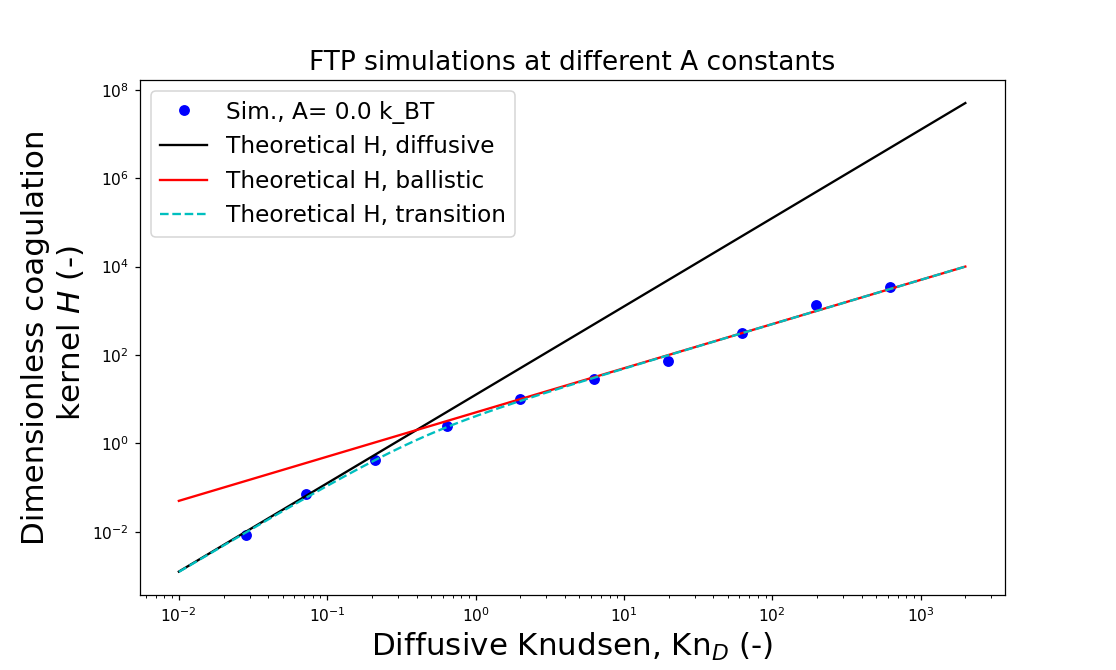

<IPython.core.display.Javascript object>


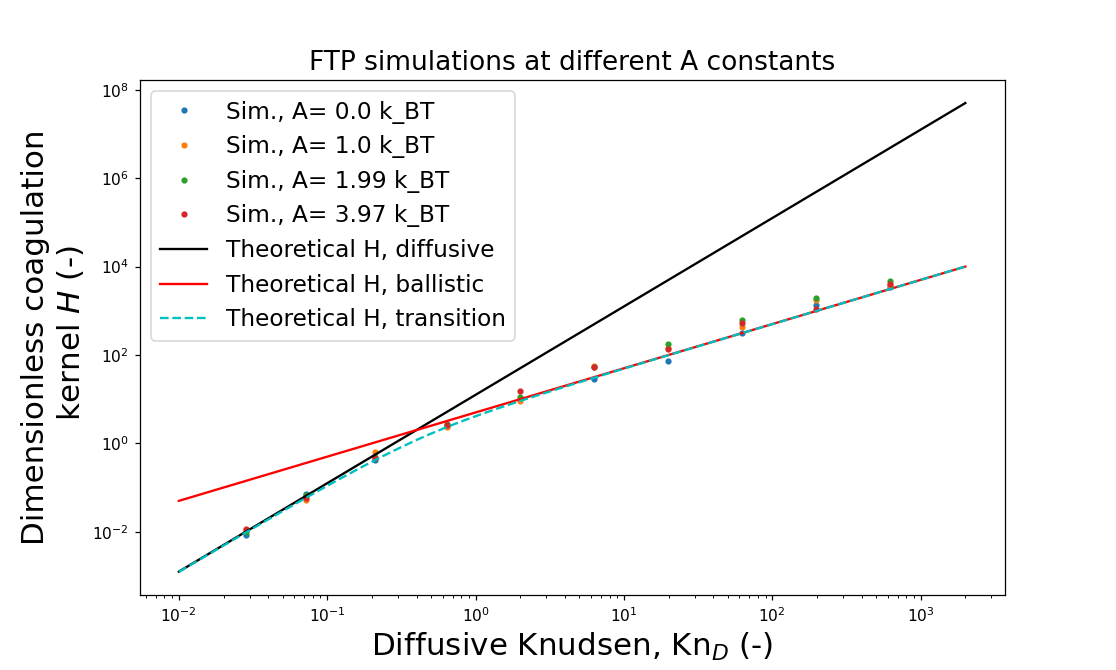

(<matplotlib.legend.Legend at 0x7fb2692d6070>, None)

In [66]:
fig, ax1 = plt.subplots(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
A_KB = np.unique(simulations["A_j_k_BT"].values)
i=0
ax1.plot(simulations["Kn_d_j"][simulations["A_j_k_BT"] == A_KB[i]],
             simulations["H"][simulations["A_j_k_BT"] == A_KB[i]],
             "o b",label="Sim., A= "+str(round(A_KB[i],2))+" k_BT")
#ax1.plot(Kn_d_j[0],H_cont_teo,"x k",label="Theoretical H, diffusive")
ax1.plot(Kn_d2, H_theo_d,"-k",label="Theoretical H, diffusive")
ax1.plot(Kn_d2, H_theo_b,"-r",label="Theoretical H, ballistic")
ax1.plot(Kn_d2, H_theo,"--c",label="Theoretical H, transition")
title = "FTP simulations at different A constants"
plt.title(title,fontsize=17)
plt.xscale("log"); plt.yscale("log");
#plt.ylim([2e-04,8e-03]); #plt.xlim([1e-02,1e-01])
ax1.set_xlabel('Diffusive Knudsen, Kn$_D$ (-)', fontsize=20)
ax1.set_ylabel('Dimensionless coagulation\n kernel $H$ (-)', fontsize=20)
plt.legend(fontsize=15, loc=0), plt.show()


fig, ax1 = plt.subplots(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
A_KB = np.unique(simulations["A_j_k_BT"].values)
for i in range(len(A_KB)):
    ax1.plot(simulations["Kn_d_j"][simulations["A_j_k_BT"] == A_KB[i]],
             simulations["H"][simulations["A_j_k_BT"] == A_KB[i]],
             ".",label="Sim., A= "+str(round(A_KB[i],2))+" k_BT")
#ax1.plot(Kn_d_j[0],H_cont_teo,"x k",label="Theoretical H, diffusive")
ax1.plot(Kn_d2, H_theo_d,"-k",label="Theoretical H, diffusive")
ax1.plot(Kn_d2, H_theo_b,"-r",label="Theoretical H, ballistic")
ax1.plot(Kn_d2, H_theo,"--c",label="Theoretical H, transition")
title = "FTP simulations at different A constants"
plt.title(title,fontsize=17)
plt.xscale("log"); plt.yscale("log");
#plt.ylim([2e-04,8e-03]); #plt.xlim([1e-02,1e-01])
ax1.set_xlabel('Diffusive Knudsen, Kn$_D$ (-)', fontsize=20)
ax1.set_ylabel('Dimensionless coagulation\n kernel $H$ (-)', fontsize=20)
plt.legend(fontsize=15, loc=0), plt.show()

<IPython.core.display.Javascript object>


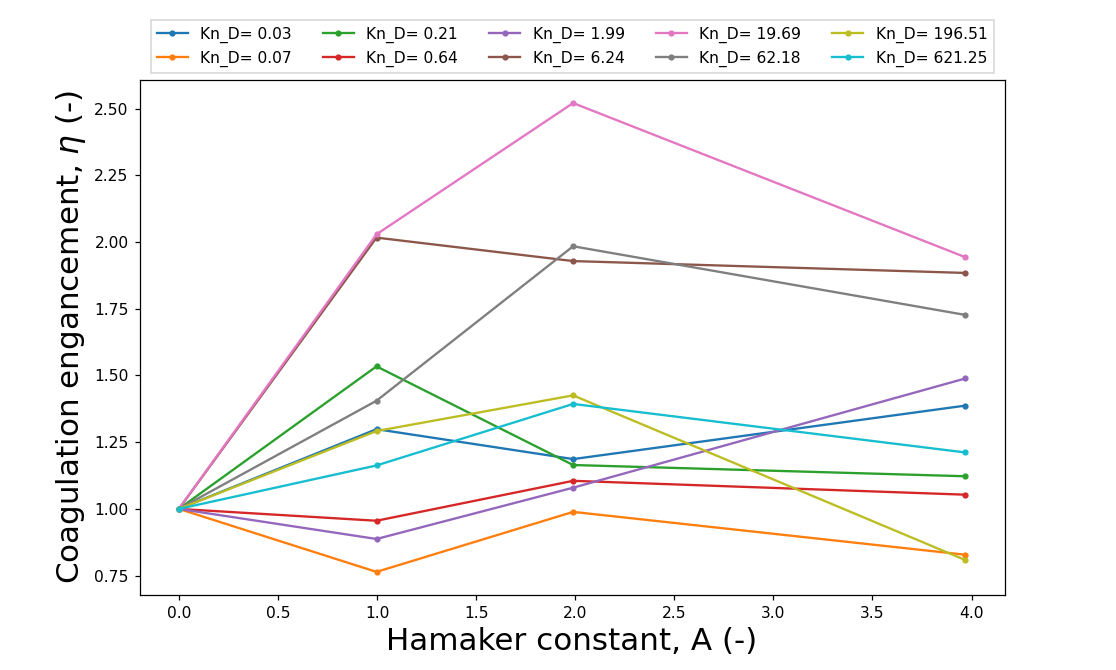

In [65]:
fig, ax1 = plt.subplots(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
Kn_d_j = np.unique(simulations["Kn_d_j"].values)
for i in range(len(Kn_d_j)):
    a = simulations["A_j_k_BT"][simulations["Kn_d_j"] == Kn_d_j[i]].values
    h = simulations["H"][simulations["Kn_d_j"] == Kn_d_j[i]].values
    arr1inds = a.argsort()
    h = h[arr1inds]
    a = a[arr1inds]
    ax1.plot(a,h/h[0],".-",label="Kn_D= "+str(round(Kn_d_j[i],2)))
#ax1.plot(Kn_d_j[0],H_cont_teo,"x k",label="Theoretical H, diffusive")
#title = "FTP simulations at different A constants"
#plt.title(title,fontsize=17)
#plt.xscale("log"); #plt.yscale("log");
#plt.ylim([2e-04,8e-03]); #plt.xlim([1e-02,1e-01])
ax1.set_xlabel('Hamaker constant, A (-)', fontsize=20)
ax1.set_ylabel('Coagulation engancement, $\eta$ (-)', fontsize=20)
#plt.legend(fontsize=15, loc=0), plt.show()
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.13),
          ncol=5, fancybox=False, shadow=False)